In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Note

<font size="4.5">To use <span style="color:blue">**Cartopy**</span>, a library to plot data with basemaps (see cells below), it is necessary to <span style="color:red">activate the internet connection</span> of that notebook (in edit mode, you can find on the right column, in the *Settings* section, a row entitled *Internet*, put the slider bar on **on**).  </font>

<font size="4.5">If it does not still work, check you use the latest environment (in the *Settings* section, click on **Preferences**).</font>

In [2]:
#open the file with station coordinates (latitude/longitude)

coords_fname  = '/kaggle/input/defi-ia-2022-test/Other/Other/stations_coordinates.csv'
coords = pd.read_csv(coords_fname)
coords['number_sta'] = coords['number_sta'].astype('category')  
display(coords)

,number_sta,lat,lon,height_sta
0,86118001,46.477,0.985,120.0
1,86149001,46.917,0.025,60.0
2,56081003,48.050,-3.660,165.0
3,53215001,47.790,-0.710,63.0
4,22135001,48.550,-3.380,148.0
...,...,...,...,...
320,86137003,47.035,0.098,96.0
321,86165005,46.412,0.841,153.0
322,86273001,46.464,1.042,121.0
323,91200002,48.526,1.993,116.0


In [3]:
#open Y_train
fname = '/kaggle/input/defi-ia-2022-test/Train/Train/Y_train.csv'
param = 'Ground_truth'  #weather parameter name in the file ('Ground_truth' about Y and 'Prediction' about baseline)
data = pd.read_csv(fname, parse_dates=['date'], infer_datetime_format=True)
data['number_sta'] = data['number_sta'].astype('category')

display(data)

,date,number_sta,Ground_truth,Id
0,2016-01-02,14066001,3.4,14066001_1_0
1,2016-01-03,14066001,11.7,14066001_1_1
2,2016-01-04,14066001,0.6,14066001_1_2
3,2016-01-05,14066001,0.4,14066001_1_3
4,2016-01-06,14066001,3.0,14066001_1_4
...,...,...,...,...
170085,2017-12-27,86272002,1.2,86272002_12_725
170086,2017-12-28,86272002,0.2,86272002_12_726
170087,2017-12-29,86272002,1.6,86272002_12_727
170088,2017-12-30,86272002,5.6,86272002_12_728


In [4]:
#filter on a given date
date = '2017-12-15'
d_sub = data[data['date'] == date]

display(d_sub.head())
display(d_sub.tail())

,date,number_sta,Ground_truth,Id
713,2017-12-15,14066001,7.4,14066001_12_713
1443,2017-12-15,14126001,0.0,14126001_12_713
2173,2017-12-15,14137001,NaN,14137001_12_713
2903,2017-12-15,14216001,5.2,14216001_12_713
3633,2017-12-15,14296001,7.9,14296001_12_713


,date,number_sta,Ground_truth,Id
167153,2017-12-15,86039001,1.0,86039001_12_713
167883,2017-12-15,86097001,1.2,86097001_12_713
168613,2017-12-15,86137003,0.0,86137003_12_713
169343,2017-12-15,86165005,0.8,86165005_12_713
170073,2017-12-15,86272002,1.2,86272002_12_713


In [5]:
#get the station coordinates for the selected date
d_sub = d_sub.merge(coords, on=['number_sta'], how='left')
d_sub

,date,number_sta,Ground_truth,Id,lat,lon,height_sta
0,2017-12-15,14066001,7.4,14066001_12_713,49.334,-0.431,2.0
1,2017-12-15,14126001,0.0,14126001_12_713,49.145,0.042,125.0
2,2017-12-15,14137001,NaN,14137001_12_713,49.180,-0.456,67.0
3,2017-12-15,14216001,5.2,14216001_12_713,48.928,-0.149,155.0
4,2017-12-15,14296001,7.9,14296001_12_713,48.795,-1.037,336.0
...,...,...,...,...,...,...,...
228,2017-12-15,86039001,1.0,86039001_12_713,46.276,0.190,148.0
229,2017-12-15,86097001,1.2,86097001_12_713,46.321,0.410,122.0
230,2017-12-15,86137003,0.0,86137003_12_713,47.035,0.098,96.0
231,2017-12-15,86165005,0.8,86165005_12_713,46.412,0.841,153.0


## Plot the data for a given date

### Simple scatter plot

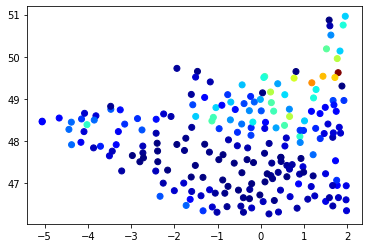

In [6]:
plt.scatter(d_sub['lon'], d_sub['lat'], c=d_sub[param], cmap='jet')
plt.show()

### Plot with Cartopy

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


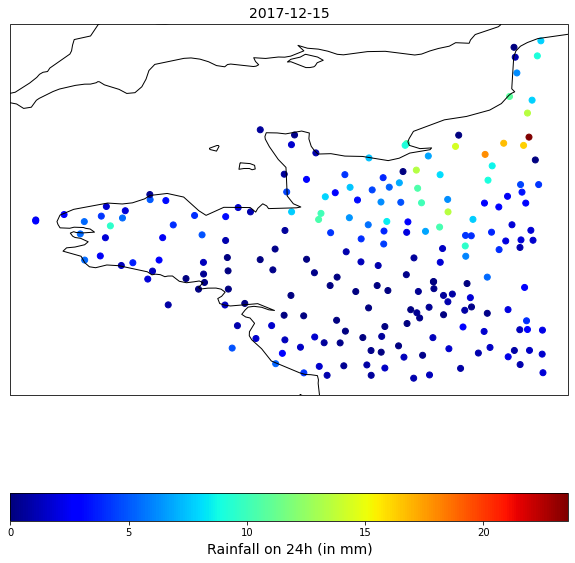

In [8]:
# Coordinates of studied area boundaries (in °N and °E)
lllat = 46.25  #lower left latitude
urlat = 51.896  #upper right latitude
lllon = -5.842  #lower left longitude
urlon = 2  #upper right longitude
extent = [lllon, urlon, lllat, urlat]

fig = plt.figure(figsize=(10,12))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
plt.scatter(d_sub['lon'], d_sub['lat'], c=d_sub[param], cmap='jet')  # Plot

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

#legend
plt.colorbar( orientation= 'horizontal').set_label('Rainfall on 24h (in mm)',fontsize=14)
plt.title(str(date),fontsize=14)

plt.show()